Linear regression with Gradient Descent

In [18]:
import numpy as np
import matplotlib.pyplot as plt
w_init, b_init = 0, 0
# Height (cm)
X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
# Weight (kg)
y = np.array([49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

X = (X-X.min()) / (X.max() - X.min())
y = (y-y.min()) / (y.max() - y.min())
X.shape, y.shape

((13,), (13,))

Iteration 0: w = 0.0039507422402159246, b = 0.005425101214574899, cost = 0.19752825228889698
Iteration 10: w = 0.04110341485498345, b = 0.0556822031576649, cost = 0.158665578795937
Iteration 20: w = 0.07434587781971261, b = 0.09931540762261866, cost = 0.12872867171997895
Iteration 30: w = 0.10415719477362521, b = 0.1371478273867171, cost = 0.10564554084339071
Iteration 40: w = 0.13095715046001144, b = 0.16990063770392336, cost = 0.08782550567519501
Iteration 50: w = 0.15511359020944657, b = 0.19820569810703423, cost = 0.0740473855584698
Iteration 60: w = 0.1769488506691682, b = 0.22261661140965805, cost = 0.06337366366807759
Iteration 70: w = 0.19674539429815496, b = 0.2436184134099139, cost = 0.05508459105789688
Iteration 80: w = 0.21475074621556914, b = 0.2616360628388422, cost = 0.048627598602616645
Iteration 90: w = 0.2311818197833553, b = 0.27704188010414077, cost = 0.043578460747680986
Iteration 100: w = 0.2462287066083403, b = 0.29016206498668534, cost = 0.03961148107437969
Iter

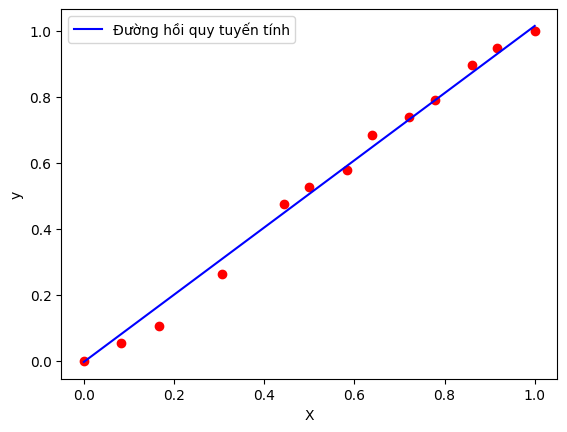

1.0179268086376765 -0.0038134672391337407


In [27]:
def compute_cost(w, x, y, b):
    num = x.shape[0]
    cost = 0
    for i in range(num):
        y_hat = w*(x[i]) + b
        cost += (y_hat - y[i])**2
    cost /= (2*num)
    return cost

def compute_gradient(w, x, y, b):
    num = x.shape[0]
    dw = 0
    db = 0
    for i in range(num):
        dw += x[i]*(w*(x[i]) + b - y[i])
        db += w*(x[i]) + b - y[i]
    dw = dw/num
    db = db/num
    return dw, db

def train(w, x, y, b, lr):
    for i in range(4000):
        dw, db = compute_gradient(w, x, y, b)
        w = w - lr*dw
        b = b - lr*db
        cost = compute_cost(w, x, y, b)
        if i%10 == 0:
            print(f"Iteration {i}: w = {w}, b = {b}, cost = {cost}")
    return w, b
def plot(X, y, w, b):
    plt.figure()
    plt.plot(X, y, 'ro')  # Vẽ các điểm dữ liệu
    plt.xlabel("X")
    plt.ylabel("y")
    
    # Vẽ đường hồi quy trên toàn bộ phạm vi của X
    plt.plot([min(X), max(X)], [w*min(X) + b, w*max(X) + b], color="blue", label="Đường hồi quy tuyến tính")
    
    plt.legend()  # Hiển thị chú thích cho đường hồi quy
    plt.show()

w, b = train(w_init, X, y, b_init, 0.01)
plot(X, y, w, b)
print(w, b)

Gradient Descent OOP style

Iteration 0: w = 0.0039507422402159246, b = 0.005425101214574899, cost = 0.19752825228889698
Iteration 10: w = 0.04110341485498345, b = 0.0556822031576649, cost = 0.158665578795937
Iteration 20: w = 0.07434587781971261, b = 0.09931540762261866, cost = 0.12872867171997895
Iteration 30: w = 0.10415719477362521, b = 0.1371478273867171, cost = 0.10564554084339071
Iteration 40: w = 0.13095715046001144, b = 0.16990063770392336, cost = 0.08782550567519501
Iteration 50: w = 0.15511359020944657, b = 0.19820569810703423, cost = 0.0740473855584698
Iteration 60: w = 0.1769488506691682, b = 0.22261661140965805, cost = 0.06337366366807759
Iteration 70: w = 0.19674539429815496, b = 0.2436184134099139, cost = 0.05508459105789688
Iteration 80: w = 0.21475074621556914, b = 0.2616360628388422, cost = 0.048627598602616645
Iteration 90: w = 0.2311818197833553, b = 0.27704188010414077, cost = 0.043578460747680986
Iteration 100: w = 0.2462287066083403, b = 0.29016206498668534, cost = 0.03961148107437969
Iter

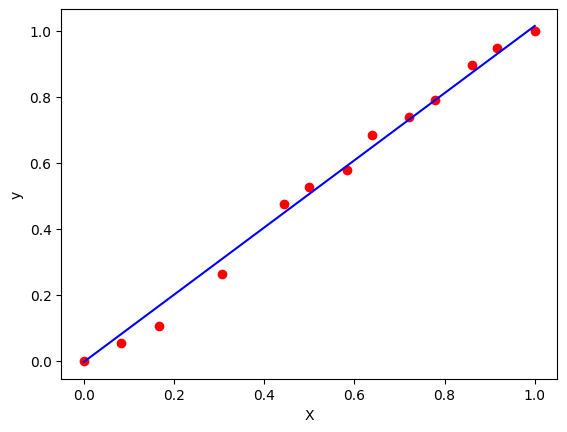

In [26]:
class Gradient_Descent:
    def __init__(self):
        self.b = 0
        self.w = 0
        self.lr = 0.01
    def compute_cost(self, X, y):
        num = X.shape[0]
        cost = 0
        for i in range(num):
            y_hat = self.w*(X[i]) + self.b
            cost += (y_hat - y[i])**2
        cost /= (2*num)
        return cost

    def compute_gradient(self, X, y):
        num = X.shape[0]
        dw = 0
        db = 0
        for i in range(num):
            dw += X[i]*(self.w*(X[i]) + self.b - y[i])
            db += self.w*(X[i]) + self.b - y[i]
        dw = dw/num
        db = db/num
        return dw, db

    def train(self, X, y):
        for i in range(4000):
            dw, db = self.compute_gradient(X, y)
            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db
            cost = self.compute_cost(X, y)
            if i%10 == 0:
                print(f"Iteration {i}: w = {self.w}, b = {self.b}, cost = {cost}")
        return w, b
    def plot(self, X, y):
        plt.figure()
        plt.plot(X, y, 'ro')  # Vẽ các điểm dữ liệu
        plt.xlabel("X")
        plt.ylabel("y")
        
        # Vẽ đường hồi quy trên toàn bộ phạm vi của X
        plt.plot([min(X), max(X)], [self.w*min(X) + self.b, self.w*max(X) + self.b], color="blue", label="Đường hồi quy tuyến tính")
        plt.show()
model = Gradient_Descent()
model.w, model.b = model.train(X, y)
model.plot(X, y)